<a href="https://colab.research.google.com/github/smit-1z/DataMiningTermProject/blob/main/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/mehrdadsadeghi/intel-image-classification-transfer-learning

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' ## hide tf warnings
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
IMAGE_SHAPE = (150, 150)
BATCH_SIZE = 32

# Define train and test data path

train_dir='/content/drive/MyDrive/ImageDataSet/Train'
test_dir='/content/drive/MyDrive/ImageDataSet/Test'

print('Training images:')
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                              image_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              label_mode="categorical")

print('Testing images:')
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                              image_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              label_mode="categorical")

Training images:
Found 1459 files belonging to 6 classes.
Testing images:
Found 176 files belonging to 6 classes.


['cheetah', 'fox', 'hyena', 'lion', 'tiger', 'wolf']


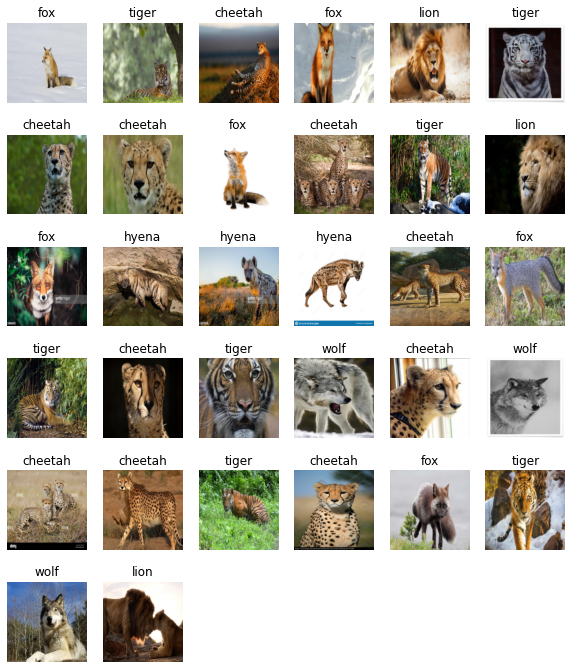

In [5]:
plt.figure(figsize=(10, 12))
class_names = train_data.class_names
print(class_names)
for images, labels in train_data.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

In [6]:
# Checkpoint path
CheckpointPath="EfficientNetB0.h5"

CheckpointCallback= tf.keras.callbacks.ModelCheckpoint(
                            filepath=CheckpointPath,
                            verbose=1,
                            save_best_only=True,
                            save_weights_only=False,
                            monitor='val_accuracy',
                            save_freq=1
)

In [7]:
Learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                             mode='auto',
                                            cooldown=1 )

In [8]:
Early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                                  min_delta=0.001,
                                                  patience = 5,
                                                  verbose = 1,
                                                  restore_best_weights=True)

In [9]:
# Create base model (load the pre-trained model)
base_model_EfficientNetB0 = tf.keras.applications.EfficientNetB0(include_top=False)

# Freeze the base model (pre-trained patterns aren't update during training)
base_model_EfficientNetB0.trainable = False

# Create inputs 
inputs = tf.keras.layers.Input(shape=(150,150,3), name="input_layer")

# Pass the inputs to the base model
x = base_model_EfficientNetB0(inputs)

# Average pooling the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Create output activation layer
outputs = tf.keras.layers.Dense(6,activation="softmax", name="output_layer")(x)

# Combine the inputs with the outputs into a model
model_1 = tf.keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=["accuracy"])

# Fit the model and save its history
history_1 = model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data),
                       callbacks=[
                                  CheckpointCallback,
                                  Early_stopping,
                                  Learning_rate_reduction])

16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/5


 1/46 [..............................] - ETA: 10:21 - loss: 2.0658 - accuracy: 0.0625

 2/46 [>.............................] - ETA: 1:56 - loss: 2.0314 - accuracy: 0.0469 

 3/46 [>.............................] - ETA: 2:08 - loss: 2.0147 - accuracy: 0.0312

 4/46 [=>............................] - ETA: 2:06 - loss: 1.9806 - accuracy: 0.0547

 5/46 [==>...........................] - ETA: 2:08 - loss: 1.9715 - accuracy: 0.0688

 6/46 [==>...........................] - ETA: 2:02 - loss: 1.9719 - accuracy: 0.0729

 7/46 [===>..........................] - ETA: 1:58 - loss: 1.9707 - accuracy: 0.0670

 8/46 [====>.........................] - ETA: 1:54 - loss: 1.9554 - accuracy: 0.0742

 9/46 [====>.........................] - ETA: 1:50 - loss: 1.9435 - accuracy: 0.0833

10/46 [=====>........................] - ETA: 1:48 - loss: 1.9376 - accuracy: 0.0938

11/46 [======>.......................] - ETA: 1:45 - loss: 1.9357 - accuracy: 0.0938

12/46 [======>.......................] - ETA: 1:42 - loss: 1.9346 - accuracy: 0.0911

13/46 [=======>......................] - ETA: 1:40 - loss: 1.9260 - accuracy: 0.0889

14/46 [========>.....................] - ETA: 1:36 - loss: 1.9238 - accuracy: 0.0893

15/46 [========>.....................] - ETA: 1:34 - loss: 1.9256 - accuracy: 0.0854

16/46 [=========>....................] - ETA: 1:31 - loss: 1.9143 - accuracy: 0.0898

17/46 [==========>...................] - ETA: 1:28 - loss: 1.9111 - accuracy: 0.0938

18/46 [==========>...................] - ETA: 1:24 - loss: 1.9031 - accuracy: 0.0972

19/46 [===========>..................] - ETA: 1:22 - loss: 1.8971 - accuracy: 0.1020

20/46 [============>.................] - ETA: 1:18 - loss: 1.8954 - accuracy: 0.1063

21/46 [============>.................] - ETA: 1:15 - loss: 1.8944 - accuracy: 0.1071

22/46 [=============>................] - ETA: 1:13 - loss: 1.8900 - accuracy: 0.1094

23/46 [==============>...............] - ETA: 1:09 - loss: 1.8871 - accuracy: 0.1114

24/46 [==============>...............] - ETA: 1:06 - loss: 1.8798 - accuracy: 0.1185

25/46 [===============>..............] - ETA: 1:03 - loss: 1.8748 - accuracy: 0.1262

26/46 [===============>..............] - ETA: 59s - loss: 1.8680 - accuracy: 0.1334 

27/46 [================>.............] - ETA: 57s - loss: 1.8628 - accuracy: 0.1354

28/46 [=================>............] - ETA: 54s - loss: 1.8592 - accuracy: 0.1395

29/46 [=================>............] - ETA: 50s - loss: 1.8554 - accuracy: 0.1444

30/46 [==================>...........] - ETA: 47s - loss: 1.8502 - accuracy: 0.1490

31/46 [===================>..........] - ETA: 45s - loss: 1.8432 - accuracy: 0.1562

32/46 [===================>..........] - ETA: 41s - loss: 1.8345 - accuracy: 0.1621

33/46 [====================>.........] - ETA: 39s - loss: 1.8302 - accuracy: 0.1619

34/46 [=====================>........] - ETA: 36s - loss: 1.8249 - accuracy: 0.1664

35/46 [=====================>........] - ETA: 33s - loss: 1.8189 - accuracy: 0.1714

36/46 [======================>.......] - ETA: 30s - loss: 1.8142 - accuracy: 0.1736

37/46 [=======================>......] - ETA: 27s - loss: 1.8094 - accuracy: 0.1782

38/46 [=======================>......] - ETA: 23s - loss: 1.8037 - accuracy: 0.1842

39/46 [========================>.....] - ETA: 20s - loss: 1.8003 - accuracy: 0.1867

40/46 [=========================>....] - ETA: 16s - loss: 1.7949 - accuracy: 0.1922

41/46 [=========================>....] - ETA: 13s - loss: 1.7890 - accuracy: 0.1974

42/46 [==========================>...] - ETA: 10s - loss: 1.7836 - accuracy: 0.2016

43/46 [===========================>..] - ETA: 7s - loss: 1.7772 - accuracy: 0.2086 

45/46 [============================>.] - ETA: 2s - loss: 1.7691 - accuracy: 0.2181

46/46 [==============================] - 148s 3s/step - loss: 1.7662 - accuracy: 0.2221 - val_loss: 1.5328 - val_accuracy: 0.4261 - lr: 1.0000e-04
Epoch 2/5


 1/46 [..............................] - ETA: 33s - loss: 1.5914 - accuracy: 0.3750

 2/46 [>.............................] - ETA: 5s - loss: 1.5831 - accuracy: 0.4062 

 3/46 [>.............................] - ETA: 4s - loss: 1.5771 - accuracy: 0.4375

 4/46 [=>............................] - ETA: 4s - loss: 1.5960 - accuracy: 0.4219

 5/46 [==>...........................] - ETA: 4s - loss: 1.5713 - accuracy: 0.4563

 6/46 [==>...........................] - ETA: 4s - loss: 1.5486 - accuracy: 0.4740

 7/46 [===>..........................] - ETA: 4s - loss: 1.5354 - accuracy: 0.4821

 8/46 [====>.........................] - ETA: 4s - loss: 1.5248 - accuracy: 0.4922

 9/46 [====>.........................] - ETA: 3s - loss: 1.5191 - accuracy: 0.4931

10/46 [=====>........................] - ETA: 3s - loss: 1.5154 - accuracy: 0.5000

11/46 [======>.......................] - ETA: 3s - loss: 1.5123 - accuracy: 0.4915

12/46 [======>.......................] - ETA: 3s - loss: 1.5091 - accuracy: 0.4870

13/46 [=======>......................] - ETA: 3s - loss: 1.5113 - accuracy: 0.4856

14/46 [========>.....................] - ETA: 3s - loss: 1.5100 - accuracy: 0.4866

15/46 [========>.....................] - ETA: 3s - loss: 1.5047 - accuracy: 0.4875

16/46 [=========>....................] - ETA: 3s - loss: 1.5022 - accuracy: 0.4902

17/46 [==========>...................] - ETA: 3s - loss: 1.4960 - accuracy: 0.5037

18/46 [==========>...................] - ETA: 3s - loss: 1.4939 - accuracy: 0.5069

19/46 [===========>..................] - ETA: 2s - loss: 1.4940 - accuracy: 0.4967

20/46 [============>.................] - ETA: 2s - loss: 1.4887 - accuracy: 0.5000

21/46 [============>.................] - ETA: 2s - loss: 1.4866 - accuracy: 0.5030

22/46 [=============>................] - ETA: 2s - loss: 1.4856 - accuracy: 0.5043

23/46 [==============>...............] - ETA: 2s - loss: 1.4807 - accuracy: 0.5122

24/46 [==============>...............] - ETA: 2s - loss: 1.4765 - accuracy: 0.5195

25/46 [===============>..............] - ETA: 2s - loss: 1.4708 - accuracy: 0.5225

26/46 [===============>..............] - ETA: 2s - loss: 1.4679 - accuracy: 0.5216

27/46 [================>.............] - ETA: 2s - loss: 1.4680 - accuracy: 0.5208

28/46 [=================>............] - ETA: 1s - loss: 1.4684 - accuracy: 0.5212

29/46 [=================>............] - ETA: 1s - loss: 1.4666 - accuracy: 0.5226

30/46 [==================>...........] - ETA: 1s - loss: 1.4636 - accuracy: 0.5260

31/46 [===================>..........] - ETA: 1s - loss: 1.4589 - accuracy: 0.5323

32/46 [===================>..........] - ETA: 1s - loss: 1.4571 - accuracy: 0.5332

33/46 [====================>.........] - ETA: 1s - loss: 1.4538 - accuracy: 0.5388

34/46 [=====================>........] - ETA: 1s - loss: 1.4477 - accuracy: 0.5450

35/46 [=====================>........] - ETA: 1s - loss: 1.4458 - accuracy: 0.5455

36/46 [======================>.......] - ETA: 1s - loss: 1.4431 - accuracy: 0.5469

37/46 [=======================>......] - ETA: 0s - loss: 1.4392 - accuracy: 0.5515

38/46 [=======================>......] - ETA: 0s - loss: 1.4319 - accuracy: 0.5567

39/46 [========================>.....] - ETA: 0s - loss: 1.4300 - accuracy: 0.5593

40/46 [=========================>....] - ETA: 0s - loss: 1.4257 - accuracy: 0.5641

41/46 [=========================>....] - ETA: 0s - loss: 1.4219 - accuracy: 0.5678

43/46 [===========================>..] - ETA: 0s - loss: 1.4107 - accuracy: 0.5763

45/46 [============================>.] - ETA: 0s - loss: 1.4002 - accuracy: 0.5840

46/46 [==============================] - 6s 115ms/step - loss: 1.3985 - accuracy: 0.5860 - val_loss: 1.2112 - val_accuracy: 0.7386 - lr: 1.0000e-04
Epoch 3/5


 1/46 [..............................] - ETA: 34s - loss: 1.2687 - accuracy: 0.6875

 2/46 [>.............................] - ETA: 4s - loss: 1.2762 - accuracy: 0.7031 

 3/46 [>.............................] - ETA: 4s - loss: 1.2756 - accuracy: 0.6875

 4/46 [=>............................] - ETA: 4s - loss: 1.2563 - accuracy: 0.7109

 5/46 [==>...........................] - ETA: 4s - loss: 1.2388 - accuracy: 0.7250

 6/46 [==>...........................] - ETA: 4s - loss: 1.2251 - accuracy: 0.7188

 7/46 [===>..........................] - ETA: 4s - loss: 1.2394 - accuracy: 0.7054

 8/46 [====>.........................] - ETA: 4s - loss: 1.2412 - accuracy: 0.7031

 9/46 [====>.........................] - ETA: 3s - loss: 1.2334 - accuracy: 0.6979

10/46 [=====>........................] - ETA: 3s - loss: 1.2294 - accuracy: 0.7000

11/46 [======>.......................] - ETA: 3s - loss: 1.2273 - accuracy: 0.7102

12/46 [======>.......................] - ETA: 3s - loss: 1.2162 - accuracy: 0.7214

13/46 [=======>......................] - ETA: 3s - loss: 1.2087 - accuracy: 0.7284

14/46 [========>.....................] - ETA: 3s - loss: 1.2041 - accuracy: 0.7321

15/46 [========>.....................] - ETA: 3s - loss: 1.2006 - accuracy: 0.7312

16/46 [=========>....................] - ETA: 3s - loss: 1.2016 - accuracy: 0.7344

17/46 [==========>...................] - ETA: 3s - loss: 1.1996 - accuracy: 0.7371

18/46 [==========>...................] - ETA: 2s - loss: 1.1943 - accuracy: 0.7413

19/46 [===========>..................] - ETA: 2s - loss: 1.1911 - accuracy: 0.7418

20/46 [============>.................] - ETA: 2s - loss: 1.1885 - accuracy: 0.7453

21/46 [============>.................] - ETA: 2s - loss: 1.1861 - accuracy: 0.7500

22/46 [=============>................] - ETA: 2s - loss: 1.1839 - accuracy: 0.7500

23/46 [==============>...............] - ETA: 2s - loss: 1.1797 - accuracy: 0.7514

24/46 [==============>...............] - ETA: 2s - loss: 1.1743 - accuracy: 0.7578

25/46 [===============>..............] - ETA: 2s - loss: 1.1705 - accuracy: 0.7575

26/46 [===============>..............] - ETA: 2s - loss: 1.1658 - accuracy: 0.7632

27/46 [================>.............] - ETA: 2s - loss: 1.1640 - accuracy: 0.7639

28/46 [=================>............] - ETA: 1s - loss: 1.1597 - accuracy: 0.7701

29/46 [=================>............] - ETA: 1s - loss: 1.1573 - accuracy: 0.7716

30/46 [==================>...........] - ETA: 1s - loss: 1.1567 - accuracy: 0.7719

31/46 [===================>..........] - ETA: 1s - loss: 1.1512 - accuracy: 0.7752

32/46 [===================>..........] - ETA: 1s - loss: 1.1439 - accuracy: 0.7783

33/46 [====================>.........] - ETA: 1s - loss: 1.1405 - accuracy: 0.7794

34/46 [=====================>........] - ETA: 1s - loss: 1.1368 - accuracy: 0.7822

35/46 [=====================>........] - ETA: 1s - loss: 1.1354 - accuracy: 0.7830

36/46 [======================>.......] - ETA: 1s - loss: 1.1332 - accuracy: 0.7821

37/46 [=======================>......] - ETA: 0s - loss: 1.1290 - accuracy: 0.7855

38/46 [=======================>......] - ETA: 0s - loss: 1.1272 - accuracy: 0.7862

39/46 [========================>.....] - ETA: 0s - loss: 1.1223 - accuracy: 0.7885

40/46 [=========================>....] - ETA: 0s - loss: 1.1176 - accuracy: 0.7914

42/46 [==========================>...] - ETA: 0s - loss: 1.1152 - accuracy: 0.7917

44/46 [===========================>..] - ETA: 0s - loss: 1.1088 - accuracy: 0.7962

46/46 [==============================] - 6s 112ms/step - loss: 1.1040 - accuracy: 0.7985 - val_loss: 0.9665 - val_accuracy: 0.8864 - lr: 1.0000e-04
Epoch 4/5


 1/46 [..............................] - ETA: 34s - loss: 0.9427 - accuracy: 0.8750

 2/46 [>.............................] - ETA: 5s - loss: 1.0376 - accuracy: 0.7969 

 3/46 [>.............................] - ETA: 5s - loss: 1.0060 - accuracy: 0.8333

 4/46 [=>............................] - ETA: 5s - loss: 0.9762 - accuracy: 0.8281

 5/46 [==>...........................] - ETA: 4s - loss: 0.9677 - accuracy: 0.8313

 6/46 [==>...........................] - ETA: 4s - loss: 0.9549 - accuracy: 0.8542

 7/46 [===>..........................] - ETA: 4s - loss: 0.9742 - accuracy: 0.8304

 8/46 [====>.........................] - ETA: 4s - loss: 0.9684 - accuracy: 0.8438

 9/46 [====>.........................] - ETA: 4s - loss: 0.9633 - accuracy: 0.8507

10/46 [=====>........................] - ETA: 4s - loss: 0.9592 - accuracy: 0.8469

11/46 [======>.......................] - ETA: 4s - loss: 0.9564 - accuracy: 0.8551

12/46 [======>.......................] - ETA: 3s - loss: 0.9577 - accuracy: 0.8516

13/46 [=======>......................] - ETA: 3s - loss: 0.9550 - accuracy: 0.8582

14/46 [========>.....................] - ETA: 3s - loss: 0.9538 - accuracy: 0.8616

15/46 [========>.....................] - ETA: 3s - loss: 0.9476 - accuracy: 0.8667

16/46 [=========>....................] - ETA: 3s - loss: 0.9437 - accuracy: 0.8691

17/46 [==========>...................] - ETA: 3s - loss: 0.9376 - accuracy: 0.8750

18/46 [==========>...................] - ETA: 3s - loss: 0.9400 - accuracy: 0.8767

19/46 [===========>..................] - ETA: 3s - loss: 0.9390 - accuracy: 0.8832

20/46 [============>.................] - ETA: 2s - loss: 0.9367 - accuracy: 0.8844

21/46 [============>.................] - ETA: 2s - loss: 0.9341 - accuracy: 0.8869

22/46 [=============>................] - ETA: 2s - loss: 0.9327 - accuracy: 0.8878

23/46 [==============>...............] - ETA: 2s - loss: 0.9289 - accuracy: 0.8899

24/46 [==============>...............] - ETA: 2s - loss: 0.9249 - accuracy: 0.8919

25/46 [===============>..............] - ETA: 2s - loss: 0.9234 - accuracy: 0.8925

26/46 [===============>..............] - ETA: 2s - loss: 0.9205 - accuracy: 0.8942

27/46 [================>.............] - ETA: 2s - loss: 0.9199 - accuracy: 0.8970

28/46 [=================>............] - ETA: 2s - loss: 0.9183 - accuracy: 0.8973

29/46 [=================>............] - ETA: 1s - loss: 0.9166 - accuracy: 0.8987

30/46 [==================>...........] - ETA: 1s - loss: 0.9121 - accuracy: 0.9010

31/46 [===================>..........] - ETA: 1s - loss: 0.9089 - accuracy: 0.9022

32/46 [===================>..........] - ETA: 1s - loss: 0.9055 - accuracy: 0.9023

33/46 [====================>.........] - ETA: 1s - loss: 0.9032 - accuracy: 0.9053

34/46 [=====================>........] - ETA: 1s - loss: 0.9013 - accuracy: 0.9053

35/46 [=====================>........] - ETA: 1s - loss: 0.9003 - accuracy: 0.9054

36/46 [======================>.......] - ETA: 1s - loss: 0.8986 - accuracy: 0.9062

37/46 [=======================>......] - ETA: 1s - loss: 0.8985 - accuracy: 0.9046

38/46 [=======================>......] - ETA: 0s - loss: 0.8963 - accuracy: 0.9054

39/46 [========================>.....] - ETA: 0s - loss: 0.8940 - accuracy: 0.9071

40/46 [=========================>....] - ETA: 0s - loss: 0.8904 - accuracy: 0.9086

41/46 [=========================>....] - ETA: 0s - loss: 0.8897 - accuracy: 0.9093

43/46 [===========================>..] - ETA: 0s - loss: 0.8848 - accuracy: 0.9092

45/46 [============================>.] - ETA: 0s - loss: 0.8816 - accuracy: 0.9097

46/46 [==============================] - 6s 115ms/step - loss: 0.8807 - accuracy: 0.9095 - val_loss: 0.7827 - val_accuracy: 0.9432 - lr: 1.0000e-04
Epoch 5/5


 1/46 [..............................] - ETA: 33s - loss: 0.8141 - accuracy: 0.8750

 2/46 [>.............................] - ETA: 5s - loss: 0.7742 - accuracy: 0.9219 

 3/46 [>.............................] - ETA: 4s - loss: 0.7814 - accuracy: 0.9167

 4/46 [=>............................] - ETA: 4s - loss: 0.7776 - accuracy: 0.9219

 5/46 [==>...........................] - ETA: 4s - loss: 0.7789 - accuracy: 0.9187

 6/46 [==>...........................] - ETA: 4s - loss: 0.7977 - accuracy: 0.9115

 7/46 [===>..........................] - ETA: 4s - loss: 0.7927 - accuracy: 0.9152

 8/46 [====>.........................] - ETA: 4s - loss: 0.7881 - accuracy: 0.9180

 9/46 [====>.........................] - ETA: 4s - loss: 0.7861 - accuracy: 0.9167

10/46 [=====>........................] - ETA: 4s - loss: 0.7731 - accuracy: 0.9219

11/46 [======>.......................] - ETA: 3s - loss: 0.7693 - accuracy: 0.9261

12/46 [======>.......................] - ETA: 3s - loss: 0.7679 - accuracy: 0.9271

13/46 [=======>......................] - ETA: 3s - loss: 0.7611 - accuracy: 0.9327

14/46 [========>.....................] - ETA: 3s - loss: 0.7563 - accuracy: 0.9375

15/46 [========>.....................] - ETA: 3s - loss: 0.7545 - accuracy: 0.9396

16/46 [=========>....................] - ETA: 3s - loss: 0.7568 - accuracy: 0.9414

17/46 [==========>...................] - ETA: 3s - loss: 0.7608 - accuracy: 0.9357

18/46 [==========>...................] - ETA: 3s - loss: 0.7592 - accuracy: 0.9375

19/46 [===========>..................] - ETA: 3s - loss: 0.7614 - accuracy: 0.9391

20/46 [============>.................] - ETA: 2s - loss: 0.7603 - accuracy: 0.9422

21/46 [============>.................] - ETA: 2s - loss: 0.7572 - accuracy: 0.9449

22/46 [=============>................] - ETA: 2s - loss: 0.7602 - accuracy: 0.9418

23/46 [==============>...............] - ETA: 2s - loss: 0.7522 - accuracy: 0.9443

24/46 [==============>...............] - ETA: 2s - loss: 0.7495 - accuracy: 0.9453

25/46 [===============>..............] - ETA: 2s - loss: 0.7438 - accuracy: 0.9475

26/46 [===============>..............] - ETA: 2s - loss: 0.7407 - accuracy: 0.9471

27/46 [================>.............] - ETA: 2s - loss: 0.7390 - accuracy: 0.9479

28/46 [=================>............] - ETA: 2s - loss: 0.7343 - accuracy: 0.9498

29/46 [=================>............] - ETA: 1s - loss: 0.7338 - accuracy: 0.9483

30/46 [==================>...........] - ETA: 1s - loss: 0.7287 - accuracy: 0.9490

31/46 [===================>..........] - ETA: 1s - loss: 0.7280 - accuracy: 0.9466

32/46 [===================>..........] - ETA: 1s - loss: 0.7276 - accuracy: 0.9463

33/46 [====================>.........] - ETA: 1s - loss: 0.7254 - accuracy: 0.9470

34/46 [=====================>........] - ETA: 1s - loss: 0.7262 - accuracy: 0.9449

35/46 [=====================>........] - ETA: 1s - loss: 0.7252 - accuracy: 0.9455

36/46 [======================>.......] - ETA: 1s - loss: 0.7249 - accuracy: 0.9453

37/46 [=======================>......] - ETA: 1s - loss: 0.7218 - accuracy: 0.9468

38/46 [=======================>......] - ETA: 0s - loss: 0.7210 - accuracy: 0.9474

39/46 [========================>.....] - ETA: 0s - loss: 0.7219 - accuracy: 0.9479

40/46 [=========================>....] - ETA: 0s - loss: 0.7189 - accuracy: 0.9477

41/46 [=========================>....] - ETA: 0s - loss: 0.7167 - accuracy: 0.9482

42/46 [==========================>...] - ETA: 0s - loss: 0.7144 - accuracy: 0.9494

44/46 [===========================>..] - ETA: 0s - loss: 0.7094 - accuracy: 0.9517

46/46 [==============================] - 6s 116ms/step - loss: 0.7055 - accuracy: 0.9527 - val_loss: 0.6465 - val_accuracy: 0.9545 - lr: 1.0000e-04


In [10]:
def plotModelAccuracy(modelHistory):
  plt.plot(modelHistory.history['accuracy'])
  plt.plot(modelHistory.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['training_accuracy', 'val_accuracy'], loc='upper left')
  plt.show()

  #ref https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy

def plotModelLoss(modelHistory):
  plt.plot(modelHistory.history['loss'])
  plt.plot(modelHistory.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'], loc='upper left')
  plt.show()

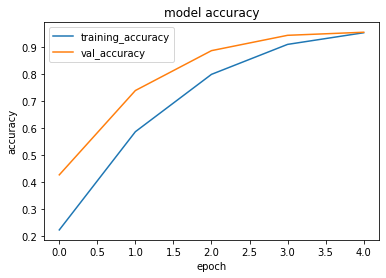

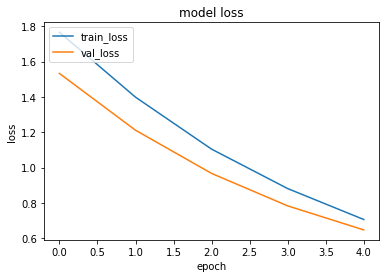

In [11]:
plotModelAccuracy(history_1)
plotModelLoss(history_1)


In [12]:
# Unfreeze all layers of the base model
base_model_EfficientNetB0.trainable= True

# Freeze all layers except the last 15 layer
for layer in base_model_EfficientNetB0.layers[:-15]:
    layer.trainable=False

# Recompile
model_1.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=["accuracy"])

In [13]:
#Fine tune for another 5 epochs
initial_epochs= 5
fine_tune_epochs=initial_epochs + 5

history_2 = model_1.fit(train_data,
                                       epochs=fine_tune_epochs,
                                       validation_data=test_data,
                                       validation_steps=len(test_data),
                                       initial_epoch=history_1.epoch[-1],
                                       callbacks=[
                                  CheckpointCallback,
                                  Early_stopping,
                                  Learning_rate_reduction])

Epoch 5/10


 1/46 [..............................] - ETA: 6:00 - loss: 1.2335 - accuracy: 0.6562

 2/46 [>.............................] - ETA: 5s - loss: 1.2317 - accuracy: 0.6094  

 3/46 [>.............................] - ETA: 5s - loss: 1.1256 - accuracy: 0.6667

 4/46 [=>............................] - ETA: 4s - loss: 1.0863 - accuracy: 0.6875

 5/46 [==>...........................] - ETA: 4s - loss: 1.0456 - accuracy: 0.7188

 6/46 [==>...........................] - ETA: 4s - loss: 1.0538 - accuracy: 0.7083

 7/46 [===>..........................] - ETA: 4s - loss: 1.0321 - accuracy: 0.7232

 8/46 [====>.........................] - ETA: 4s - loss: 1.0356 - accuracy: 0.7188

 9/46 [====>.........................] - ETA: 4s - loss: 1.0330 - accuracy: 0.7153

10/46 [=====>........................] - ETA: 3s - loss: 1.0035 - accuracy: 0.7406

11/46 [======>.......................] - ETA: 3s - loss: 0.9871 - accuracy: 0.7443

12/46 [======>.......................] - ETA: 3s - loss: 0.9766 - accuracy: 0.7422

13/46 [=======>......................] - ETA: 3s - loss: 0.9543 - accuracy: 0.7500

14/46 [========>.....................] - ETA: 3s - loss: 0.9329 - accuracy: 0.7589

15/46 [========>.....................] - ETA: 3s - loss: 0.9143 - accuracy: 0.7688

16/46 [=========>....................] - ETA: 3s - loss: 0.9013 - accuracy: 0.7754

17/46 [==========>...................] - ETA: 3s - loss: 0.8856 - accuracy: 0.7849

18/46 [==========>...................] - ETA: 2s - loss: 0.8763 - accuracy: 0.7899

19/46 [===========>..................] - ETA: 2s - loss: 0.8650 - accuracy: 0.7911

20/46 [============>.................] - ETA: 2s - loss: 0.8484 - accuracy: 0.8000

21/46 [============>.................] - ETA: 2s - loss: 0.8395 - accuracy: 0.8021

22/46 [=============>................] - ETA: 2s - loss: 0.8289 - accuracy: 0.8097

23/46 [==============>...............] - ETA: 2s - loss: 0.8121 - accuracy: 0.8166

24/46 [==============>...............] - ETA: 2s - loss: 0.7994 - accuracy: 0.8229

25/46 [===============>..............] - ETA: 2s - loss: 0.7876 - accuracy: 0.8275

26/46 [===============>..............] - ETA: 2s - loss: 0.7763 - accuracy: 0.8317

27/46 [================>.............] - ETA: 2s - loss: 0.7643 - accuracy: 0.8356

28/46 [=================>............] - ETA: 1s - loss: 0.7524 - accuracy: 0.8404

29/46 [=================>............] - ETA: 1s - loss: 0.7435 - accuracy: 0.8438

30/46 [==================>...........] - ETA: 1s - loss: 0.7354 - accuracy: 0.8438

31/46 [===================>..........] - ETA: 1s - loss: 0.7253 - accuracy: 0.8478

32/46 [===================>..........] - ETA: 1s - loss: 0.7155 - accuracy: 0.8525

33/46 [====================>.........] - ETA: 1s - loss: 0.7040 - accuracy: 0.8551

34/46 [=====================>........] - ETA: 1s - loss: 0.6976 - accuracy: 0.8566

35/46 [=====================>........] - ETA: 1s - loss: 0.6884 - accuracy: 0.8607

36/46 [======================>.......] - ETA: 1s - loss: 0.6796 - accuracy: 0.8637

37/46 [=======================>......] - ETA: 0s - loss: 0.6688 - accuracy: 0.8674

38/46 [=======================>......] - ETA: 0s - loss: 0.6603 - accuracy: 0.8701

39/46 [========================>.....] - ETA: 0s - loss: 0.6517 - accuracy: 0.8726

40/46 [=========================>....] - ETA: 0s - loss: 0.6437 - accuracy: 0.8742

41/46 [=========================>....] - ETA: 0s - loss: 0.6379 - accuracy: 0.8758

42/46 [==========================>...] - ETA: 0s - loss: 0.6303 - accuracy: 0.8780

44/46 [===========================>..] - ETA: 0s - loss: 0.6140 - accuracy: 0.8835

46/46 [==============================] - 15s 148ms/step - loss: 0.6059 - accuracy: 0.8855 - val_loss: 0.1952 - val_accuracy: 0.9545 - lr: 1.0000e-04
Epoch 6/10


 1/46 [..............................] - ETA: 34s - loss: 0.2412 - accuracy: 1.0000

 2/46 [>.............................] - ETA: 5s - loss: 0.2301 - accuracy: 1.0000 

 3/46 [>.............................] - ETA: 5s - loss: 0.2298 - accuracy: 0.9896

 4/46 [=>............................] - ETA: 4s - loss: 0.2634 - accuracy: 0.9844

 5/46 [==>...........................] - ETA: 4s - loss: 0.2736 - accuracy: 0.9812

 6/46 [==>...........................] - ETA: 4s - loss: 0.2949 - accuracy: 0.9688

 7/46 [===>..........................] - ETA: 4s - loss: 0.2968 - accuracy: 0.9688

 8/46 [====>.........................] - ETA: 4s - loss: 0.2875 - accuracy: 0.9727

 9/46 [====>.........................] - ETA: 3s - loss: 0.2801 - accuracy: 0.9722

10/46 [=====>........................] - ETA: 3s - loss: 0.2781 - accuracy: 0.9750

11/46 [======>.......................] - ETA: 3s - loss: 0.2768 - accuracy: 0.9744

12/46 [======>.......................] - ETA: 3s - loss: 0.2722 - accuracy: 0.9766

13/46 [=======>......................] - ETA: 3s - loss: 0.2715 - accuracy: 0.9760

14/46 [========>.....................] - ETA: 3s - loss: 0.2682 - accuracy: 0.9732

15/46 [========>.....................] - ETA: 3s - loss: 0.2652 - accuracy: 0.9750

16/46 [=========>....................] - ETA: 3s - loss: 0.2645 - accuracy: 0.9746

17/46 [==========>...................] - ETA: 3s - loss: 0.2650 - accuracy: 0.9724

18/46 [==========>...................] - ETA: 3s - loss: 0.2635 - accuracy: 0.9722

19/46 [===========>..................] - ETA: 2s - loss: 0.2632 - accuracy: 0.9688

20/46 [============>.................] - ETA: 2s - loss: 0.2577 - accuracy: 0.9703

21/46 [============>.................] - ETA: 2s - loss: 0.2531 - accuracy: 0.9702

22/46 [=============>................] - ETA: 2s - loss: 0.2466 - accuracy: 0.9716

23/46 [==============>...............] - ETA: 2s - loss: 0.2440 - accuracy: 0.9728

24/46 [==============>...............] - ETA: 2s - loss: 0.2408 - accuracy: 0.9727

25/46 [===============>..............] - ETA: 2s - loss: 0.2379 - accuracy: 0.9737

26/46 [===============>..............] - ETA: 2s - loss: 0.2406 - accuracy: 0.9724

27/46 [================>.............] - ETA: 2s - loss: 0.2372 - accuracy: 0.9734

28/46 [=================>............] - ETA: 1s - loss: 0.2354 - accuracy: 0.9743

29/46 [=================>............] - ETA: 1s - loss: 0.2345 - accuracy: 0.9752

30/46 [==================>...........] - ETA: 1s - loss: 0.2317 - accuracy: 0.9750

31/46 [===================>..........] - ETA: 1s - loss: 0.2284 - accuracy: 0.9758

32/46 [===================>..........] - ETA: 1s - loss: 0.2289 - accuracy: 0.9756

33/46 [====================>.........] - ETA: 1s - loss: 0.2278 - accuracy: 0.9754

34/46 [=====================>........] - ETA: 1s - loss: 0.2251 - accuracy: 0.9752

35/46 [=====================>........] - ETA: 1s - loss: 0.2243 - accuracy: 0.9750

36/46 [======================>.......] - ETA: 1s - loss: 0.2263 - accuracy: 0.9748

37/46 [=======================>......] - ETA: 1s - loss: 0.2239 - accuracy: 0.9755

38/46 [=======================>......] - ETA: 0s - loss: 0.2228 - accuracy: 0.9753

39/46 [========================>.....] - ETA: 0s - loss: 0.2211 - accuracy: 0.9760

40/46 [=========================>....] - ETA: 0s - loss: 0.2178 - accuracy: 0.9766

41/46 [=========================>....] - ETA: 0s - loss: 0.2189 - accuracy: 0.9748

42/46 [==========================>...] - ETA: 0s - loss: 0.2175 - accuracy: 0.9754

44/46 [===========================>..] - ETA: 0s - loss: 0.2142 - accuracy: 0.9759

46/46 [==============================] - 6s 116ms/step - loss: 0.2137 - accuracy: 0.9753 - val_loss: 0.1403 - val_accuracy: 0.9659 - lr: 1.0000e-04
Epoch 7/10


 1/46 [..............................] - ETA: 33s - loss: 0.1465 - accuracy: 1.0000

 2/46 [>.............................] - ETA: 5s - loss: 0.1317 - accuracy: 1.0000 

 3/46 [>.............................] - ETA: 5s - loss: 0.1727 - accuracy: 0.9688

 4/46 [=>............................] - ETA: 5s - loss: 0.1548 - accuracy: 0.9766

 5/46 [==>...........................] - ETA: 4s - loss: 0.1563 - accuracy: 0.9812

 6/46 [==>...........................] - ETA: 4s - loss: 0.1489 - accuracy: 0.9844

 7/46 [===>..........................] - ETA: 4s - loss: 0.1579 - accuracy: 0.9777

 8/46 [====>.........................] - ETA: 4s - loss: 0.1521 - accuracy: 0.9766

 9/46 [====>.........................] - ETA: 4s - loss: 0.1540 - accuracy: 0.9792

10/46 [=====>........................] - ETA: 4s - loss: 0.1636 - accuracy: 0.9750

11/46 [======>.......................] - ETA: 3s - loss: 0.1604 - accuracy: 0.9773

12/46 [======>.......................] - ETA: 3s - loss: 0.1569 - accuracy: 0.9792

13/46 [=======>......................] - ETA: 3s - loss: 0.1609 - accuracy: 0.9784

14/46 [========>.....................] - ETA: 3s - loss: 0.1587 - accuracy: 0.9777

15/46 [========>.....................] - ETA: 3s - loss: 0.1590 - accuracy: 0.9771

16/46 [=========>....................] - ETA: 3s - loss: 0.1577 - accuracy: 0.9766

17/46 [==========>...................] - ETA: 3s - loss: 0.1579 - accuracy: 0.9779

18/46 [==========>...................] - ETA: 3s - loss: 0.1633 - accuracy: 0.9774

19/46 [===========>..................] - ETA: 2s - loss: 0.1593 - accuracy: 0.9786

20/46 [============>.................] - ETA: 2s - loss: 0.1556 - accuracy: 0.9797

21/46 [============>.................] - ETA: 2s - loss: 0.1524 - accuracy: 0.9807

22/46 [=============>................] - ETA: 2s - loss: 0.1485 - accuracy: 0.9815

23/46 [==============>...............] - ETA: 2s - loss: 0.1461 - accuracy: 0.9823

24/46 [==============>...............] - ETA: 2s - loss: 0.1473 - accuracy: 0.9818

25/46 [===============>..............] - ETA: 2s - loss: 0.1487 - accuracy: 0.9812

26/46 [===============>..............] - ETA: 2s - loss: 0.1458 - accuracy: 0.9820

27/46 [================>.............] - ETA: 2s - loss: 0.1457 - accuracy: 0.9826

28/46 [=================>............] - ETA: 1s - loss: 0.1466 - accuracy: 0.9821

29/46 [=================>............] - ETA: 1s - loss: 0.1452 - accuracy: 0.9817

30/46 [==================>...........] - ETA: 1s - loss: 0.1489 - accuracy: 0.9802

31/46 [===================>..........] - ETA: 1s - loss: 0.1458 - accuracy: 0.9808

32/46 [===================>..........] - ETA: 1s - loss: 0.1454 - accuracy: 0.9814

33/46 [====================>.........] - ETA: 1s - loss: 0.1437 - accuracy: 0.9820

34/46 [=====================>........] - ETA: 1s - loss: 0.1439 - accuracy: 0.9816

35/46 [=====================>........] - ETA: 1s - loss: 0.1431 - accuracy: 0.9812

36/46 [======================>.......] - ETA: 1s - loss: 0.1424 - accuracy: 0.9818

37/46 [=======================>......] - ETA: 0s - loss: 0.1401 - accuracy: 0.9823

38/46 [=======================>......] - ETA: 0s - loss: 0.1387 - accuracy: 0.9827

39/46 [========================>.....] - ETA: 0s - loss: 0.1372 - accuracy: 0.9832

40/46 [=========================>....] - ETA: 0s - loss: 0.1371 - accuracy: 0.9836

42/46 [==========================>...] - ETA: 0s - loss: 0.1340 - accuracy: 0.9844

44/46 [===========================>..] - ETA: 0s - loss: 0.1342 - accuracy: 0.9830

46/46 [==============================] - 6s 112ms/step - loss: 0.1340 - accuracy: 0.9829 - val_loss: 0.1257 - val_accuracy: 0.9716 - lr: 1.0000e-04
Epoch 8/10


 1/46 [..............................] - ETA: 35s - loss: 0.0566 - accuracy: 1.0000

 2/46 [>.............................] - ETA: 6s - loss: 0.1404 - accuracy: 0.9688 

 3/46 [>.............................] - ETA: 5s - loss: 0.1331 - accuracy: 0.9688

 4/46 [=>............................] - ETA: 5s - loss: 0.1243 - accuracy: 0.9766

 5/46 [==>...........................] - ETA: 4s - loss: 0.1178 - accuracy: 0.9750

 6/46 [==>...........................] - ETA: 4s - loss: 0.1094 - accuracy: 0.9792

 7/46 [===>..........................] - ETA: 4s - loss: 0.1125 - accuracy: 0.9821

 8/46 [====>.........................] - ETA: 4s - loss: 0.1140 - accuracy: 0.9844

 9/46 [====>.........................] - ETA: 4s - loss: 0.1149 - accuracy: 0.9792

10/46 [=====>........................] - ETA: 4s - loss: 0.1170 - accuracy: 0.9781

11/46 [======>.......................] - ETA: 3s - loss: 0.1107 - accuracy: 0.9801

12/46 [======>.......................] - ETA: 3s - loss: 0.1090 - accuracy: 0.9818

13/46 [=======>......................] - ETA: 3s - loss: 0.1100 - accuracy: 0.9832

14/46 [========>.....................] - ETA: 3s - loss: 0.1086 - accuracy: 0.9844

15/46 [========>.....................] - ETA: 3s - loss: 0.1069 - accuracy: 0.9854

16/46 [=========>....................] - ETA: 3s - loss: 0.1066 - accuracy: 0.9844

17/46 [==========>...................] - ETA: 3s - loss: 0.1046 - accuracy: 0.9853

18/46 [==========>...................] - ETA: 3s - loss: 0.1045 - accuracy: 0.9844

19/46 [===========>..................] - ETA: 2s - loss: 0.1050 - accuracy: 0.9836

20/46 [============>.................] - ETA: 2s - loss: 0.1047 - accuracy: 0.9828

21/46 [============>.................] - ETA: 2s - loss: 0.1041 - accuracy: 0.9821

22/46 [=============>................] - ETA: 2s - loss: 0.1040 - accuracy: 0.9830

23/46 [==============>...............] - ETA: 2s - loss: 0.1041 - accuracy: 0.9823

24/46 [==============>...............] - ETA: 2s - loss: 0.1023 - accuracy: 0.9831

25/46 [===============>..............] - ETA: 2s - loss: 0.1012 - accuracy: 0.9837

26/46 [===============>..............] - ETA: 2s - loss: 0.0997 - accuracy: 0.9844

27/46 [================>.............] - ETA: 2s - loss: 0.1014 - accuracy: 0.9826

28/46 [=================>............] - ETA: 2s - loss: 0.1032 - accuracy: 0.9810

29/46 [=================>............] - ETA: 1s - loss: 0.1037 - accuracy: 0.9806

30/46 [==================>...........] - ETA: 1s - loss: 0.1047 - accuracy: 0.9792

31/46 [===================>..........] - ETA: 1s - loss: 0.1042 - accuracy: 0.9788

32/46 [===================>..........] - ETA: 1s - loss: 0.1024 - accuracy: 0.9795

33/46 [====================>.........] - ETA: 1s - loss: 0.1017 - accuracy: 0.9801

34/46 [=====================>........] - ETA: 1s - loss: 0.1026 - accuracy: 0.9807

35/46 [=====================>........] - ETA: 1s - loss: 0.1026 - accuracy: 0.9812

36/46 [======================>.......] - ETA: 1s - loss: 0.1021 - accuracy: 0.9818

37/46 [=======================>......] - ETA: 1s - loss: 0.1010 - accuracy: 0.9823

38/46 [=======================>......] - ETA: 0s - loss: 0.1011 - accuracy: 0.9827

39/46 [========================>.....] - ETA: 0s - loss: 0.0996 - accuracy: 0.9832

40/46 [=========================>....] - ETA: 0s - loss: 0.0988 - accuracy: 0.9836

42/46 [==========================>...] - ETA: 0s - loss: 0.0973 - accuracy: 0.9844

43/46 [===========================>..] - ETA: 0s - loss: 0.0957 - accuracy: 0.9847

45/46 [============================>.] - ETA: 0s - loss: 0.0944 - accuracy: 0.9847

46/46 [==============================] - 6s 117ms/step - loss: 0.0953 - accuracy: 0.9842 - val_loss: 0.1147 - val_accuracy: 0.9773 - lr: 1.0000e-04
Epoch 9/10


 1/46 [..............................] - ETA: 34s - loss: 0.0696 - accuracy: 0.9688

 2/46 [>.............................] - ETA: 5s - loss: 0.0685 - accuracy: 0.9844 

 3/46 [>.............................] - ETA: 5s - loss: 0.0650 - accuracy: 0.9896

 4/46 [=>............................] - ETA: 4s - loss: 0.0972 - accuracy: 0.9688

 5/46 [==>...........................] - ETA: 4s - loss: 0.0935 - accuracy: 0.9750

 6/46 [==>...........................] - ETA: 4s - loss: 0.1010 - accuracy: 0.9740

 7/46 [===>..........................] - ETA: 4s - loss: 0.0932 - accuracy: 0.9777

 8/46 [====>.........................] - ETA: 4s - loss: 0.0903 - accuracy: 0.9805

 9/46 [====>.........................] - ETA: 4s - loss: 0.0867 - accuracy: 0.9826

10/46 [=====>........................] - ETA: 4s - loss: 0.0843 - accuracy: 0.9812

11/46 [======>.......................] - ETA: 3s - loss: 0.0850 - accuracy: 0.9801

12/46 [======>.......................] - ETA: 3s - loss: 0.0808 - accuracy: 0.9818

13/46 [=======>......................] - ETA: 3s - loss: 0.0780 - accuracy: 0.9832

14/46 [========>.....................] - ETA: 3s - loss: 0.0773 - accuracy: 0.9844

15/46 [========>.....................] - ETA: 3s - loss: 0.0778 - accuracy: 0.9833

16/46 [=========>....................] - ETA: 3s - loss: 0.0777 - accuracy: 0.9844

17/46 [==========>...................] - ETA: 3s - loss: 0.0775 - accuracy: 0.9853

18/46 [==========>...................] - ETA: 3s - loss: 0.0765 - accuracy: 0.9861

19/46 [===========>..................] - ETA: 3s - loss: 0.0740 - accuracy: 0.9868

20/46 [============>.................] - ETA: 2s - loss: 0.0728 - accuracy: 0.9875

21/46 [============>.................] - ETA: 2s - loss: 0.0723 - accuracy: 0.9881

22/46 [=============>................] - ETA: 2s - loss: 0.0737 - accuracy: 0.9872

23/46 [==============>...............] - ETA: 2s - loss: 0.0760 - accuracy: 0.9864

24/46 [==============>...............] - ETA: 2s - loss: 0.0753 - accuracy: 0.9870

25/46 [===============>..............] - ETA: 2s - loss: 0.0749 - accuracy: 0.9875

26/46 [===============>..............] - ETA: 2s - loss: 0.0734 - accuracy: 0.9880

27/46 [================>.............] - ETA: 2s - loss: 0.0740 - accuracy: 0.9873

28/46 [=================>............] - ETA: 2s - loss: 0.0757 - accuracy: 0.9866

29/46 [=================>............] - ETA: 1s - loss: 0.0752 - accuracy: 0.9871

30/46 [==================>...........] - ETA: 1s - loss: 0.0765 - accuracy: 0.9865

31/46 [===================>..........] - ETA: 1s - loss: 0.0761 - accuracy: 0.9869

32/46 [===================>..........] - ETA: 1s - loss: 0.0758 - accuracy: 0.9873

33/46 [====================>.........] - ETA: 1s - loss: 0.0789 - accuracy: 0.9867

34/46 [=====================>........] - ETA: 1s - loss: 0.0774 - accuracy: 0.9871

35/46 [=====================>........] - ETA: 1s - loss: 0.0764 - accuracy: 0.9875

36/46 [======================>.......] - ETA: 1s - loss: 0.0750 - accuracy: 0.9878

37/46 [=======================>......] - ETA: 1s - loss: 0.0744 - accuracy: 0.9882

38/46 [=======================>......] - ETA: 0s - loss: 0.0743 - accuracy: 0.9877

39/46 [========================>.....] - ETA: 0s - loss: 0.0749 - accuracy: 0.9880

40/46 [=========================>....] - ETA: 0s - loss: 0.0748 - accuracy: 0.9875

41/46 [=========================>....] - ETA: 0s - loss: 0.0738 - accuracy: 0.9878

43/46 [===========================>..] - ETA: 0s - loss: 0.0722 - accuracy: 0.9884

44/46 [===========================>..] - ETA: 0s - loss: 0.0716 - accuracy: 0.9886

46/46 [==============================] - 6s 116ms/step - loss: 0.0735 - accuracy: 0.9883 - val_loss: 0.1104 - val_accuracy: 0.9773 - lr: 1.0000e-04
Epoch 10/10


 1/46 [..............................] - ETA: 34s - loss: 0.0545 - accuracy: 1.0000

 2/46 [>.............................] - ETA: 5s - loss: 0.0543 - accuracy: 1.0000 

 3/46 [>.............................] - ETA: 5s - loss: 0.0933 - accuracy: 0.9792

 4/46 [=>............................] - ETA: 5s - loss: 0.0858 - accuracy: 0.9844

 5/46 [==>...........................] - ETA: 4s - loss: 0.0790 - accuracy: 0.9875

 6/46 [==>...........................] - ETA: 4s - loss: 0.0739 - accuracy: 0.9896

 7/46 [===>..........................] - ETA: 4s - loss: 0.0711 - accuracy: 0.9911

 8/46 [====>.........................] - ETA: 4s - loss: 0.0724 - accuracy: 0.9883

 9/46 [====>.........................] - ETA: 4s - loss: 0.0719 - accuracy: 0.9896

10/46 [=====>........................] - ETA: 4s - loss: 0.0777 - accuracy: 0.9844

11/46 [======>.......................] - ETA: 4s - loss: 0.0751 - accuracy: 0.9858

12/46 [======>.......................] - ETA: 4s - loss: 0.0754 - accuracy: 0.9844

13/46 [=======>......................] - ETA: 3s - loss: 0.0749 - accuracy: 0.9856

14/46 [========>.....................] - ETA: 3s - loss: 0.0768 - accuracy: 0.9844

15/46 [========>.....................] - ETA: 3s - loss: 0.0732 - accuracy: 0.9854

16/46 [=========>....................] - ETA: 3s - loss: 0.0701 - accuracy: 0.9863

17/46 [==========>...................] - ETA: 3s - loss: 0.0678 - accuracy: 0.9871

18/46 [==========>...................] - ETA: 3s - loss: 0.0656 - accuracy: 0.9878

19/46 [===========>..................] - ETA: 3s - loss: 0.0637 - accuracy: 0.9885

20/46 [============>.................] - ETA: 3s - loss: 0.0624 - accuracy: 0.9891

21/46 [============>.................] - ETA: 2s - loss: 0.0610 - accuracy: 0.9896

22/46 [=============>................] - ETA: 2s - loss: 0.0601 - accuracy: 0.9901

23/46 [==============>...............] - ETA: 2s - loss: 0.0608 - accuracy: 0.9905

24/46 [==============>...............] - ETA: 2s - loss: 0.0612 - accuracy: 0.9909

25/46 [===============>..............] - ETA: 2s - loss: 0.0602 - accuracy: 0.9912

26/46 [===============>..............] - ETA: 2s - loss: 0.0604 - accuracy: 0.9904

27/46 [================>.............] - ETA: 2s - loss: 0.0598 - accuracy: 0.9907

28/46 [=================>............] - ETA: 2s - loss: 0.0619 - accuracy: 0.9900

29/46 [=================>............] - ETA: 1s - loss: 0.0608 - accuracy: 0.9903

30/46 [==================>...........] - ETA: 1s - loss: 0.0596 - accuracy: 0.9906

31/46 [===================>..........] - ETA: 1s - loss: 0.0590 - accuracy: 0.9909

32/46 [===================>..........] - ETA: 1s - loss: 0.0583 - accuracy: 0.9912

33/46 [====================>.........] - ETA: 1s - loss: 0.0589 - accuracy: 0.9915

34/46 [=====================>........] - ETA: 1s - loss: 0.0597 - accuracy: 0.9908

35/46 [=====================>........] - ETA: 1s - loss: 0.0586 - accuracy: 0.9911

36/46 [======================>.......] - ETA: 1s - loss: 0.0580 - accuracy: 0.9913

37/46 [=======================>......] - ETA: 1s - loss: 0.0575 - accuracy: 0.9916

38/46 [=======================>......] - ETA: 0s - loss: 0.0567 - accuracy: 0.9918

39/46 [========================>.....] - ETA: 0s - loss: 0.0566 - accuracy: 0.9920

40/46 [=========================>....] - ETA: 0s - loss: 0.0565 - accuracy: 0.9922

41/46 [=========================>....] - ETA: 0s - loss: 0.0568 - accuracy: 0.9924

43/46 [===========================>..] - ETA: 0s - loss: 0.0560 - accuracy: 0.9927

45/46 [============================>.] - ETA: 0s - loss: 0.0552 - accuracy: 0.9931

46/46 [==============================] - 6s 115ms/step - loss: 0.0564 - accuracy: 0.9918 - val_loss: 0.0982 - val_accuracy: 0.9773 - lr: 1.0000e-04


In [14]:
def compare_histories(history,new_history,initial_epochs):
    loss=history.history["loss"]
    val_loss=history.history["val_loss"]
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs=range(len(history.history["loss"])+len(new_history.history["loss"]))
    
    total_acc= accuracy + new_history.history["accuracy"]
    total_loss=loss+ new_history.history["loss"]
    
    total_val_acc= val_accuracy + new_history.history["val_accuracy"]
    total_val_loss=val_loss+ new_history.history["val_loss"]

    plt.figure(figsize=(8,8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc ,label="Training Accuracy")
    plt.plot(total_val_acc, label="Val Accuracy")
    plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(), label="Start Fine Tuning")
    plt.title("Training and Validation accuracy")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label="Training_loss")
    plt.plot(total_val_loss, label="Val_loss")
    plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(), label="Start Fine Tuning")
    plt.title("Training and Validation Loss")
    plt.legend()

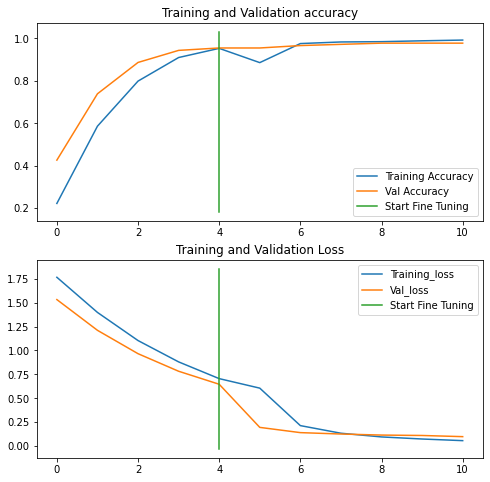

In [15]:
compare_histories(history_1,history_2,5)

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter( y=history_2.history['val_loss'], name="val_loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=history_2.history['loss'], name="loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=history_2.history['val_accuracy'], name="val accuracy"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter( y=history_2.history['accuracy'], name="val accuracy"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Mapping of loss and accuracy over the Epocs"
)

# Set x-axis title
fig.update_xaxes(title_text="Epoch")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> Loss", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> Accuracy", secondary_y=True)

fig.show()